# Modeling
In this notebook, we'll be modeling the data we've previously prepared. Out notebook will be laid out as follows:

1. Model Selection & Generation
2. Hyperparameter Optimization
3. Fine-Tuning (if needed)
4. Reporting Best Model(s) + Settings
5. Interpretation
6. Conclusion

Our eventual goal here is two-fold:

1. Accurately [and fairly] model the diabetes dataset
2. Interpret the results to find something worth recommending to those wanting to reduce risk of diabetes. This can be via LIME/SHAP (i.e. some interpretable model that approximates the neural network) or via analyzing a more simple model's structure (i.e. regression coefficients, random forest decision boundaries)

In [2]:
# Environment Setup
from utils.model import *
from utils.dataset import *

***
## Model Selection & Generation

<Train-Test Split Report>
Train: 512886 obs, 170962 no diabetes [0], 170962 pre-diabetes [1], 170962 diabetes [2]
Test: 50736 obs, 42741 no diabetes [0], 926 pre-diabetes [1], 7069 diabetes [2]
<Train-Test Split Report>
Train: 512886 obs, 170962 no diabetes [0], 170962 pre-diabetes [1], 170962 diabetes [2]
Test: 50736 obs, 42741 no diabetes [0], 926 pre-diabetes [1], 7069 diabetes [2]
<Train-Test Split Report>
Train: 512886 obs, 170962 no diabetes [0], 170962 pre-diabetes [1], 170962 diabetes [2]
Test: 50736 obs, 42741 no diabetes [0], 926 pre-diabetes [1], 7069 diabetes [2]
<Model Selected> :: tree-classifier-[p_0.4366]-[r_0.5043]-[f_0.4296]-[a_67.3407]


/opt/homebrew/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



<Test Report>
Precision: [no diabetes] 0.9407131011608624, [pre-diabetes] 0.02788074133763094, [diabetes] 0.34125237191650853
Recall: [no diabetes] 0.6901335953768045, [pre-diabetes] 0.18682505399568033, [diabetes] 0.6360164096760503
F1-Score: [no diabetes] 0.7961725845850709, [pre-diabetes] 0.048520544103211334, [diabetes] 0.4441809918988342
Support: [no diabetes] 42741, [pre-diabetes] 926, [diabetes] 7069
Accuracy: 67.3407%
Macro-F1: 0.4296


/opt/homebrew/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


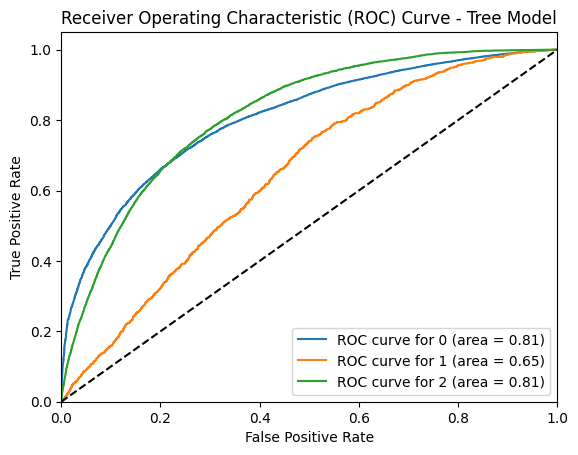

<Model Selected> :: ffnn-classifier-[p_0.4275]-[r_0.4934]-[f_0.4320]-[a_70.9831]

<Test Report>
Precision: [no diabetes] 0.9334705689310541, [pre-diabetes] 0.03458096013018715, [diabetes] 0.3143844433904736
Recall: [no diabetes] 0.7320605507592242, [pre-diabetes] 0.091792656587473, [diabetes] 0.6563870420144292
F1-Score: [no diabetes] 0.8205874639391555, [pre-diabetes] 0.050236406619385346, [diabetes] 0.4251420194245923
Support: [no diabetes] 42741, [pre-diabetes] 926, [diabetes] 7069
Accuracy: 70.9831%
Macro-F1: 0.4320


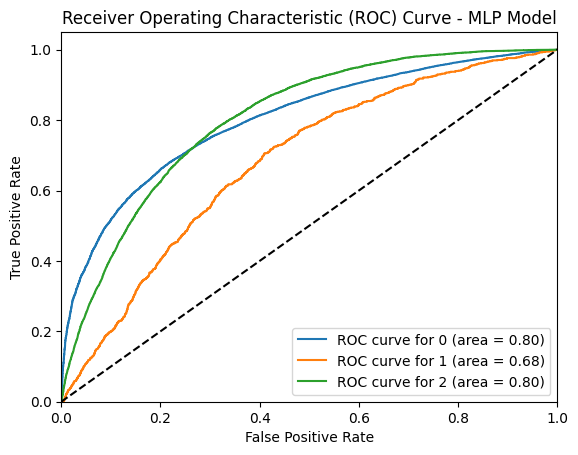

<Model Selected> :: log-classifier-[p_0.4394]-[r_0.5193]-[f_0.4118]-[a_60.7912]

<Test Report>
Precision: [no diabetes] 0.9571128550900851, [pre-diabetes] 0.028437468147997146, [diabetes] 0.3327771329077191
Recall: [no diabetes] 0.6077770758756229, [pre-diabetes] 0.30129589632829373, [diabetes] 0.6488895176121092
F1-Score: [no diabetes] 0.7434532497638877, [pre-diabetes] 0.051969823973176864, [diabetes] 0.43993669975543087
Support: [no diabetes] 42741, [pre-diabetes] 926, [diabetes] 7069
Accuracy: 60.7912%
Macro-F1: 0.4118


/opt/homebrew/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


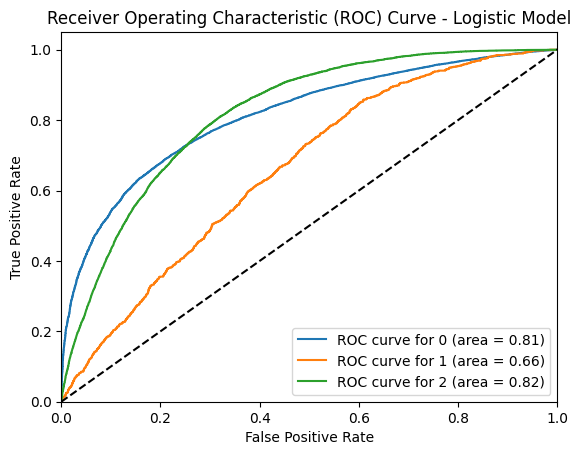

In [3]:
# generate lookup for models
models = {
    "tree": TreeClassifier(target="diabetes", path="../datasets/pre_split_processed.parquet", upsample=True),
    "ffnn": MLPClassifier(target="diabetes", path="../datasets/pre_split_processed.parquet", upsample=True, loss_balance=False),
    "log": LogClassifier(target="diabetes", path="../datasets/pre_split_processed.parquet", upsample=True)
}

# manual search
# models["tree"].set_hyperparams({
#     "loss": "log_loss",
#     "learning_rate": 0.01,
#     "n_estimators": 100,
#     "criterion": "friedman_mse",
#     "min_samples_split": 5,
#     "min_samples_leaf": 5,
#     "max_depth": 8,
#     "n_iter_no_change": 5,
#     "max_features": "sqrt",
#     "tol": 0.0001
# })
# models["ffnn"].set_hyperparams({
#     "input_size": 21,
#     "output_size": 3,
#     "hidden_size": 128,
#     "num_hidden": 4,
#     "num_epochs": 50,
#     "batch_size": 32,
#     "learning_rate": 0.00005,
#     "dropout_rate": 0.5,
#     "classify_fn": "sigmoid"
# })

# train & test basic model
skip_models = []# ["log", "ffnn", "tree"]
for mt, model in models.items():
    # attempt to load, else train and test
    if (mt in skip_models) or (not model.load_model()):
        model.train_model(verbose=2)
    model.test_model()

***
## Hyperparameter Optimization

In [ ]:
"""
Commented out since this takes a very long time to run; experiments with 
different settings for all models.
"""
# # optimize hyperparams
# optimizer_results = {model_type: model.optimize_hyperparams(kfold=2) for model_type, model in models.items()}
# print(optimizer_results)

'\nCommented out since this takes a very long time to run; experiments with \ndifferent settings for all models.\n'

***
## Up-Sampling Breakdown

<Train-Test Split Report>
Train: 512886 obs, 170962 no diabetes [0], 170962 pre-diabetes [1], 170962 diabetes [2]
Test: 50736 obs, 42741 no diabetes [0], 926 pre-diabetes [1], 7069 diabetes [2]
<Train-Test Split Report>
Train: 512886 obs, 170962 no diabetes [0], 170962 pre-diabetes [1], 170962 diabetes [2]
Test: 50736 obs, 42741 no diabetes [0], 926 pre-diabetes [1], 7069 diabetes [2]
<Train-Test Split Report>
Train: 202944 obs, 170962 no diabetes [0], 3705 pre-diabetes [1], 28277 diabetes [2]
Test: 50736 obs, 42741 no diabetes [0], 926 pre-diabetes [1], 7069 diabetes [2]


100%|██████████| 16028/16028 [00:18<00:00, 883.88it/s]


Epoch 1/50, Loss: 0.9653, Test Loss: 4.1600


100%|██████████| 16028/16028 [00:17<00:00, 904.41it/s]


Epoch 2/50, Loss: 0.9231, Test Loss: 2.5209


100%|██████████| 16028/16028 [00:17<00:00, 908.94it/s]


Epoch 3/50, Loss: 0.9134, Test Loss: 2.6921


100%|██████████| 16028/16028 [00:18<00:00, 881.43it/s]


Epoch 4/50, Loss: 0.9081, Test Loss: 2.3787


100%|██████████| 16028/16028 [00:17<00:00, 927.48it/s]


Epoch 5/50, Loss: 0.9040, Test Loss: 2.2148


100%|██████████| 16028/16028 [00:16<00:00, 949.12it/s]


Epoch 6/50, Loss: 0.8998, Test Loss: 2.2232


100%|██████████| 16028/16028 [00:17<00:00, 904.94it/s]


Epoch 7/50, Loss: 0.8975, Test Loss: 2.4903


100%|██████████| 16028/16028 [00:17<00:00, 893.79it/s]


Epoch 8/50, Loss: 0.8943, Test Loss: 2.7189


100%|██████████| 16028/16028 [00:18<00:00, 878.70it/s]


Epoch 9/50, Loss: 0.8920, Test Loss: 2.4688


100%|██████████| 16028/16028 [00:17<00:00, 897.98it/s]


Epoch 10/50, Loss: 0.8894, Test Loss: 2.5349


100%|██████████| 16028/16028 [00:19<00:00, 806.78it/s]


Epoch 11/50, Loss: 0.8867, Test Loss: 2.4094


100%|██████████| 16028/16028 [00:19<00:00, 813.37it/s]


Epoch 12/50, Loss: 0.8855, Test Loss: 2.5721


100%|██████████| 16028/16028 [00:19<00:00, 805.07it/s]


Epoch 13/50, Loss: 0.8836, Test Loss: 2.3191


100%|██████████| 16028/16028 [00:19<00:00, 806.30it/s]


Epoch 14/50, Loss: 0.8817, Test Loss: 2.7425


100%|██████████| 16028/16028 [00:19<00:00, 804.98it/s]


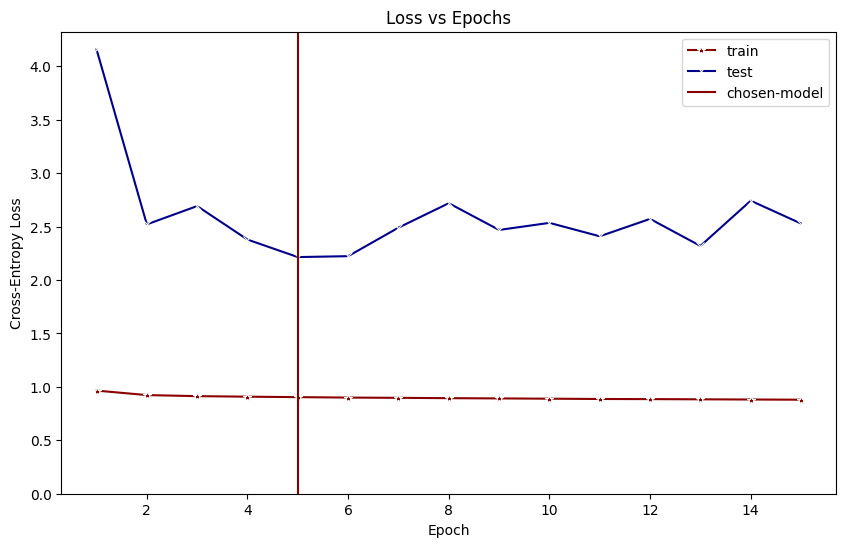



<breakdown> for smote trial

<Test Report>
Precision: [no diabetes] 0.9293626914660832, [pre-diabetes] 0.021553124661540128, [diabetes] 0.34769481844145245
Recall: [no diabetes] 0.6359701457616809, [pre-diabetes] 0.21490280777537796, [diabetes] 0.6027726694016127
F1-Score: [no diabetes] 0.7551709288919141, [pre-diabetes] 0.03917708435869672, [diabetes] 0.4410060028979507
Support: [no diabetes] 42741, [pre-diabetes] 926, [diabetes] 7069
Accuracy: 62.3660%
Macro-F1: 0.4118


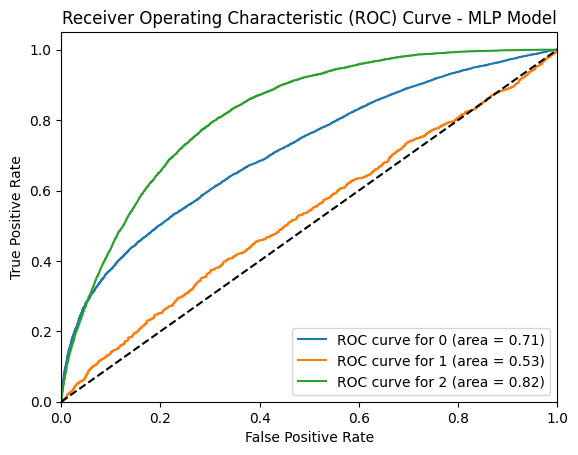

100%|██████████| 16028/16028 [00:19<00:00, 809.58it/s]


Epoch 1/50, Loss: 0.9673, Test Loss: 3.4853


100%|██████████| 16028/16028 [00:19<00:00, 825.62it/s]


Epoch 2/50, Loss: 0.9238, Test Loss: 2.9324


100%|██████████| 16028/16028 [00:19<00:00, 827.45it/s]


Epoch 3/50, Loss: 0.9133, Test Loss: 2.5905


100%|██████████| 16028/16028 [00:19<00:00, 821.75it/s]


Epoch 4/50, Loss: 0.9074, Test Loss: 2.4062


100%|██████████| 16028/16028 [00:19<00:00, 813.86it/s]


Epoch 5/50, Loss: 0.9031, Test Loss: 2.5662


100%|██████████| 16028/16028 [00:20<00:00, 796.15it/s]


Epoch 6/50, Loss: 0.8985, Test Loss: 1.9794


100%|██████████| 16028/16028 [00:19<00:00, 810.41it/s]


Epoch 7/50, Loss: 0.8957, Test Loss: 2.1056


100%|██████████| 16028/16028 [00:19<00:00, 819.17it/s]


Epoch 8/50, Loss: 0.8922, Test Loss: 2.2287


100%|██████████| 16028/16028 [00:17<00:00, 936.20it/s]


Epoch 9/50, Loss: 0.8905, Test Loss: 2.1615


100%|██████████| 16028/16028 [00:17<00:00, 939.17it/s]


Epoch 10/50, Loss: 0.8880, Test Loss: 2.1385


100%|██████████| 16028/16028 [00:17<00:00, 937.68it/s]


Epoch 11/50, Loss: 0.8858, Test Loss: 1.8874


100%|██████████| 16028/16028 [00:16<00:00, 943.82it/s] 


Epoch 12/50, Loss: 0.8836, Test Loss: 2.1704


100%|██████████| 16028/16028 [00:17<00:00, 931.11it/s]


Epoch 13/50, Loss: 0.8820, Test Loss: 2.2414


100%|██████████| 16028/16028 [00:17<00:00, 927.95it/s]


Epoch 14/50, Loss: 0.8803, Test Loss: 2.3409


100%|██████████| 16028/16028 [00:17<00:00, 903.12it/s]


Epoch 15/50, Loss: 0.8789, Test Loss: 2.9112


100%|██████████| 16028/16028 [00:18<00:00, 875.12it/s]


Epoch 16/50, Loss: 0.8772, Test Loss: 1.8766


100%|██████████| 16028/16028 [00:17<00:00, 929.54it/s]


Epoch 17/50, Loss: 0.8759, Test Loss: 1.4470


100%|██████████| 16028/16028 [00:17<00:00, 930.33it/s] 


Epoch 18/50, Loss: 0.8739, Test Loss: 1.8082


100%|██████████| 16028/16028 [00:19<00:00, 832.64it/s]


Epoch 19/50, Loss: 0.8734, Test Loss: 1.7559


100%|██████████| 16028/16028 [00:19<00:00, 815.04it/s]


Epoch 20/50, Loss: 0.8722, Test Loss: 1.6219


100%|██████████| 16028/16028 [00:19<00:00, 811.63it/s]


Epoch 21/50, Loss: 0.8714, Test Loss: 1.0740


100%|██████████| 16028/16028 [00:19<00:00, 831.46it/s]


Epoch 22/50, Loss: 0.8691, Test Loss: 2.2812


100%|██████████| 16028/16028 [00:19<00:00, 808.98it/s]


Epoch 23/50, Loss: 0.8685, Test Loss: 1.5679


100%|██████████| 16028/16028 [00:20<00:00, 768.14it/s]


Epoch 24/50, Loss: 0.8676, Test Loss: 1.3108


100%|██████████| 16028/16028 [00:21<00:00, 762.82it/s]


Epoch 25/50, Loss: 0.8670, Test Loss: 2.0679


100%|██████████| 16028/16028 [00:20<00:00, 768.19it/s]


Epoch 26/50, Loss: 0.8660, Test Loss: 1.4091


100%|██████████| 16028/16028 [00:20<00:00, 788.53it/s]


Epoch 27/50, Loss: 0.8647, Test Loss: 1.2092


100%|██████████| 16028/16028 [00:20<00:00, 773.98it/s]


Epoch 28/50, Loss: 0.8645, Test Loss: 1.0228


100%|██████████| 16028/16028 [00:19<00:00, 808.40it/s]


Epoch 29/50, Loss: 0.8634, Test Loss: 1.2323


100%|██████████| 16028/16028 [00:19<00:00, 807.47it/s]


Epoch 30/50, Loss: 0.8619, Test Loss: 1.0730


100%|██████████| 16028/16028 [00:19<00:00, 831.27it/s]


Epoch 31/50, Loss: 0.8622, Test Loss: 1.9966


100%|██████████| 16028/16028 [00:18<00:00, 856.93it/s]


Epoch 32/50, Loss: 0.8612, Test Loss: 1.6557


100%|██████████| 16028/16028 [00:18<00:00, 849.68it/s]


Epoch 33/50, Loss: 0.8604, Test Loss: 1.6431


100%|██████████| 16028/16028 [00:19<00:00, 837.76it/s]


Epoch 34/50, Loss: 0.8596, Test Loss: 1.2786


100%|██████████| 16028/16028 [00:17<00:00, 931.47it/s] 


Epoch 35/50, Loss: 0.8592, Test Loss: 1.4664


100%|██████████| 16028/16028 [00:16<00:00, 962.27it/s] 


Epoch 36/50, Loss: 0.8582, Test Loss: 1.1663


100%|██████████| 16028/16028 [00:16<00:00, 962.28it/s] 


Epoch 37/50, Loss: 0.8580, Test Loss: 1.5322


100%|██████████| 16028/16028 [00:16<00:00, 983.94it/s] 


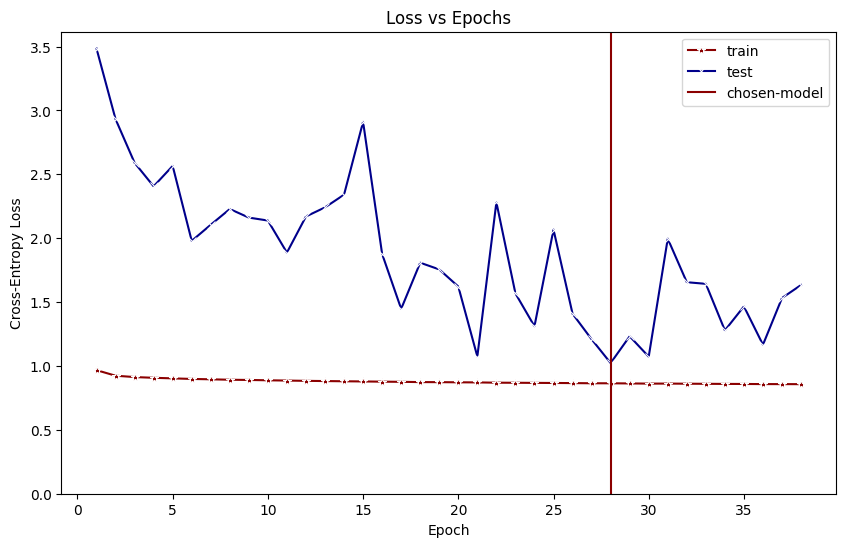



<breakdown> for bootstrap trial

<Test Report>
Precision: [no diabetes] 0.9221827890469834, [pre-diabetes] 0.021359669269637116, [diabetes] 0.3498011489173663
Recall: [no diabetes] 0.6626658243840808, [pre-diabetes] 0.20086393088552915, [diabetes] 0.5599094638562738
F1-Score: [no diabetes] 0.7711765186375147, [pre-diabetes] 0.03861324475814822, [diabetes] 0.43059181897302
Support: [no diabetes] 42741, [pre-diabetes] 926, [diabetes] 7069
Accuracy: 63.9920%
Macro-F1: 0.4135


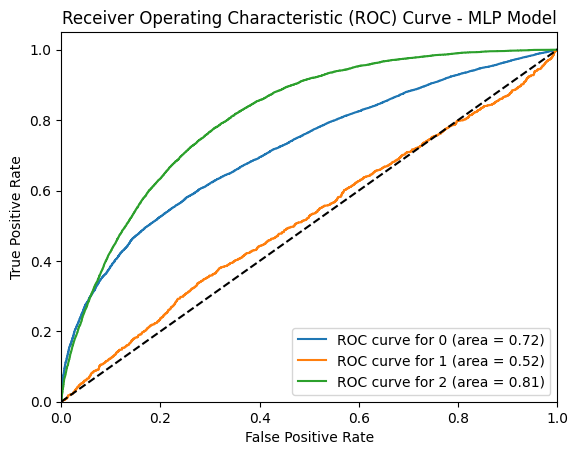

100%|██████████| 6342/6342 [00:06<00:00, 986.65it/s] 


Epoch 1/50, Loss: 0.8070, Test Loss: 4.5852


100%|██████████| 6342/6342 [00:06<00:00, 997.98it/s] 


Epoch 2/50, Loss: 0.7450, Test Loss: 4.6819


100%|██████████| 6342/6342 [00:06<00:00, 993.20it/s] 


Epoch 3/50, Loss: 0.7349, Test Loss: 4.2681


100%|██████████| 6342/6342 [00:06<00:00, 1005.68it/s]


Epoch 4/50, Loss: 0.7281, Test Loss: 3.3721


100%|██████████| 6342/6342 [00:06<00:00, 990.67it/s] 


Epoch 5/50, Loss: 0.7222, Test Loss: 3.3911


100%|██████████| 6342/6342 [00:06<00:00, 989.95it/s] 


Epoch 6/50, Loss: 0.7195, Test Loss: 3.1121


100%|██████████| 6342/6342 [00:06<00:00, 996.75it/s] 


Epoch 7/50, Loss: 0.7188, Test Loss: 2.7255


100%|██████████| 6342/6342 [00:06<00:00, 1005.19it/s]


Epoch 8/50, Loss: 0.7148, Test Loss: 2.9117


100%|██████████| 6342/6342 [00:06<00:00, 1001.76it/s]


Epoch 9/50, Loss: 0.7146, Test Loss: 2.8611


100%|██████████| 6342/6342 [00:06<00:00, 985.47it/s] 


Epoch 10/50, Loss: 0.7135, Test Loss: 2.1240


100%|██████████| 6342/6342 [00:06<00:00, 1004.79it/s]


Epoch 11/50, Loss: 0.7113, Test Loss: 2.0319


100%|██████████| 6342/6342 [00:06<00:00, 1006.29it/s]


Epoch 12/50, Loss: 0.7105, Test Loss: 2.4464


100%|██████████| 6342/6342 [00:07<00:00, 872.64it/s]


Epoch 13/50, Loss: 0.7088, Test Loss: 2.4594


100%|██████████| 6342/6342 [00:07<00:00, 801.24it/s]


Epoch 14/50, Loss: 0.7096, Test Loss: 1.8935


100%|██████████| 6342/6342 [00:07<00:00, 802.68it/s]


Epoch 15/50, Loss: 0.7082, Test Loss: 2.2363


100%|██████████| 6342/6342 [00:07<00:00, 807.08it/s]


Epoch 16/50, Loss: 0.7073, Test Loss: 1.8188


100%|██████████| 6342/6342 [00:06<00:00, 916.03it/s]


Epoch 17/50, Loss: 0.7074, Test Loss: 2.0421


100%|██████████| 6342/6342 [00:07<00:00, 897.36it/s]


Epoch 18/50, Loss: 0.7061, Test Loss: 1.6511


100%|██████████| 6342/6342 [00:07<00:00, 902.76it/s]


Epoch 19/50, Loss: 0.7063, Test Loss: 1.2695


100%|██████████| 6342/6342 [00:06<00:00, 948.79it/s] 


Epoch 20/50, Loss: 0.7053, Test Loss: 1.6430


100%|██████████| 6342/6342 [00:06<00:00, 999.52it/s] 


Epoch 21/50, Loss: 0.7045, Test Loss: 1.3600


100%|██████████| 6342/6342 [00:06<00:00, 937.68it/s] 


Epoch 22/50, Loss: 0.7046, Test Loss: 1.4183


100%|██████████| 6342/6342 [00:07<00:00, 899.27it/s]


Epoch 23/50, Loss: 0.7039, Test Loss: 1.6384


100%|██████████| 6342/6342 [00:07<00:00, 895.23it/s]


Epoch 24/50, Loss: 0.7059, Test Loss: 1.2954


100%|██████████| 6342/6342 [00:07<00:00, 884.98it/s]


Epoch 25/50, Loss: 0.7036, Test Loss: 1.2049


100%|██████████| 6342/6342 [00:06<00:00, 936.64it/s] 


Epoch 26/50, Loss: 0.7031, Test Loss: 1.3535


100%|██████████| 6342/6342 [00:07<00:00, 884.91it/s]


Epoch 27/50, Loss: 0.7018, Test Loss: 1.4354


100%|██████████| 6342/6342 [00:07<00:00, 809.34it/s]


Epoch 28/50, Loss: 0.7016, Test Loss: 1.6644


100%|██████████| 6342/6342 [00:07<00:00, 845.83it/s]


Epoch 29/50, Loss: 0.7025, Test Loss: 1.2585


100%|██████████| 6342/6342 [00:07<00:00, 860.87it/s]


Epoch 30/50, Loss: 0.7014, Test Loss: 1.3968


100%|██████████| 6342/6342 [00:07<00:00, 830.43it/s]


Epoch 31/50, Loss: 0.7017, Test Loss: 1.3522


100%|██████████| 6342/6342 [00:07<00:00, 842.45it/s]


Epoch 32/50, Loss: 0.7016, Test Loss: 1.1783


100%|██████████| 6342/6342 [00:07<00:00, 848.71it/s]


Epoch 33/50, Loss: 0.7009, Test Loss: 1.3536


100%|██████████| 6342/6342 [00:07<00:00, 842.50it/s]


Epoch 34/50, Loss: 0.7007, Test Loss: 1.2207


100%|██████████| 6342/6342 [00:07<00:00, 823.75it/s]


Epoch 35/50, Loss: 0.7003, Test Loss: 1.3568


100%|██████████| 6342/6342 [00:07<00:00, 849.68it/s]


Epoch 36/50, Loss: 0.7000, Test Loss: 1.1534


100%|██████████| 6342/6342 [00:07<00:00, 852.35it/s]


Epoch 37/50, Loss: 0.6998, Test Loss: 1.2616


100%|██████████| 6342/6342 [00:07<00:00, 816.93it/s]


Epoch 38/50, Loss: 0.6994, Test Loss: 1.1732


100%|██████████| 6342/6342 [00:07<00:00, 840.44it/s]


Epoch 39/50, Loss: 0.7000, Test Loss: 1.1690


100%|██████████| 6342/6342 [00:07<00:00, 851.31it/s]


Epoch 40/50, Loss: 0.6995, Test Loss: 1.2972


100%|██████████| 6342/6342 [00:07<00:00, 840.78it/s]


Epoch 41/50, Loss: 0.6991, Test Loss: 1.1781


100%|██████████| 6342/6342 [00:07<00:00, 827.48it/s]


Epoch 42/50, Loss: 0.6990, Test Loss: 1.2901


100%|██████████| 6342/6342 [00:07<00:00, 815.74it/s]


Epoch 43/50, Loss: 0.6982, Test Loss: 1.4050


100%|██████████| 6342/6342 [00:08<00:00, 751.05it/s]


Epoch 44/50, Loss: 0.6976, Test Loss: 1.2851


100%|██████████| 6342/6342 [00:07<00:00, 825.70it/s]


Epoch 45/50, Loss: 0.6989, Test Loss: 1.4518


100%|██████████| 6342/6342 [00:07<00:00, 864.19it/s]


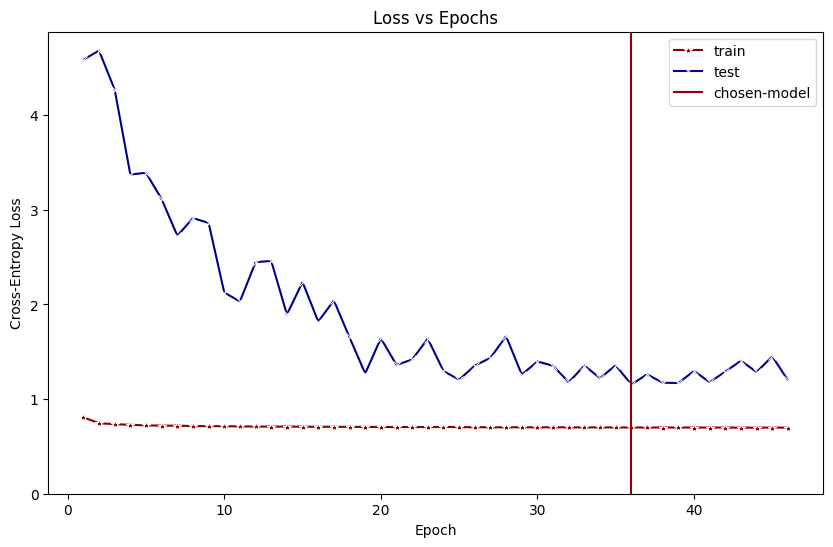

/opt/homebrew/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))




<breakdown> for loss trial

<Test Report>
Precision: [no diabetes] 0.9552157477097026, [pre-diabetes] 0.0, [diabetes] 0.2809151733495532
Recall: [no diabetes] 0.6562317212980511, [pre-diabetes] 0.0, [diabetes] 0.8493421983307399
F1-Score: [no diabetes] 0.7779873516032397, [pre-diabetes] 0.0, [diabetes] 0.42219253217073344
Support: [no diabetes] 42741, [pre-diabetes] 926, [diabetes] 7069
Accuracy: 67.1161%
Macro-F1: 0.4001


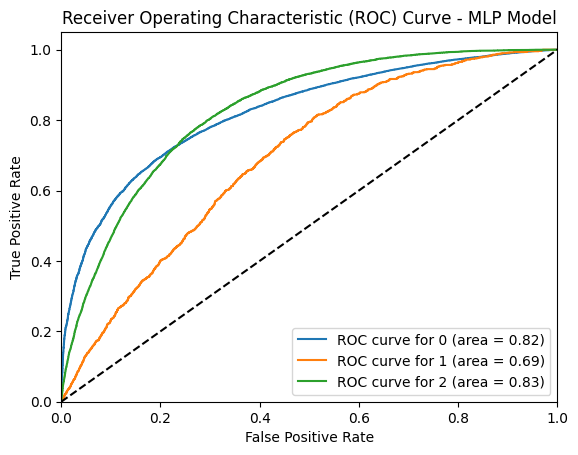

In [5]:
# define model strategies to try
models = {
    "smote": MLPClassifier(target="diabetes", path="../datasets/pre_split_processed.parquet", upsample=True, loss_balance=False),
    "bootstrap": MLPClassifier(target="diabetes", path="../datasets/pre_split_processed.parquet", upsample=True, use_smote=False, loss_balance=False),
    "loss": MLPClassifier(target="diabetes", path="../datasets/pre_split_processed.parquet", upsample=False, loss_balance=True)
}

for strat, model in models.items():
    # setup
    model.set_hyperparams({
        "input_size": 21,
        "output_size": 3,
        "hidden_size": 128,
        "num_hidden": 4,
        "num_epochs": 50,
        "batch_size": 32,
        "learning_rate": 0.00005,
        "dropout_rate": 0.5,
        "classify_fn": "sigmoid"
    })

    # breakdown
    model.train_model(verbose=1)

    print(f"\n\n<breakdown> for {strat} trial")
    model.test_model()

***
## Interpretation

In [ ]:
# Logistic-Approximation for Deep Learner
models["log"].explain_model()

{'high_bp': -0.23327178047453906,
 'high_chol': -0.334126644121848,
 'chol_check': -0.15132506947633687,
 'bmi': -0.40283705380462403,
 'smoker': 0.0,
 'stroke': 0.0,
 'heart_disease': 0.0,
 'physical_activity': 0.004631891965842328,
 'fruits': 0.040052444835019095,
 'veggies': 0.0,
 'heavy_drinker': 0.05994501018275364,
 'healthcare': 0.0,
 'no_doc_bc_cost': -0.05123929528640953,
 'general_health': -0.639927900219654,
 'mental_health': 0.014953609073340198,
 'physical_health': 0.1436857442771119,
 'diff_walk': 0.0,
 'sex': -0.024910195125215147,
 'age': -0.4073858118266818,
 'education': 0.08061386743733419,
 'income': 0.0226290781615139}

In [ ]:
# <breakdown> for loss trial

    # <Test Report>
    # Precision: [no diabetes] 0.9552157477097026, [pre-diabetes] 0.0, [diabetes] 0.2809151733495532
    # Recall: [no diabetes] 0.6562317212980511, [pre-diabetes] 0.0, [diabetes] 0.8493421983307399
    # F1-Score: [no diabetes] 0.7779873516032397, [pre-diabetes] 0.0, [diabetes] 0.42219253217073344
# Support: [no diabetes] 42741, [pre-diabetes] 926, [diabetes] 7069
# Accuracy: 67.1161%
# Macro-F1: 0.4001



# <breakdown> for bootstrap trial

# <Test Report>
# Precision: [no diabetes] 0.9221827890469834, [pre-diabetes] 0.021359669269637116, [diabetes] 0.3498011489173663
# Recall: [no diabetes] 0.6626658243840808, [pre-diabetes] 0.20086393088552915, [diabetes] 0.5599094638562738
# F1-Score: [no diabetes] 0.7711765186375147, [pre-diabetes] 0.03861324475814822, [diabetes] 0.43059181897302
# Support: [no diabetes] 42741, [pre-diabetes] 926, [diabetes] 7069
# Accuracy: 63.9920%
# Macro-F1: 0.4135



# <breakdown> for smote trial

# <Test Report>
# Precision: [no diabetes] 0.9293626914660832, [pre-diabetes] 0.021553124661540128, [diabetes] 0.34769481844145245
# Recall: [no diabetes] 0.6359701457616809, [pre-diabetes] 0.21490280777537796, [diabetes] 0.6027726694016127
# F1-Score: [no diabetes] 0.7551709288919141, [pre-diabetes] 0.03917708435869672, [diabetes] 0.4410060028979507
# Support: [no diabetes] 42741, [pre-diabetes] 926, [diabetes] 7069
# Accuracy: 62.3660%
# Macro-F1: 0.4118

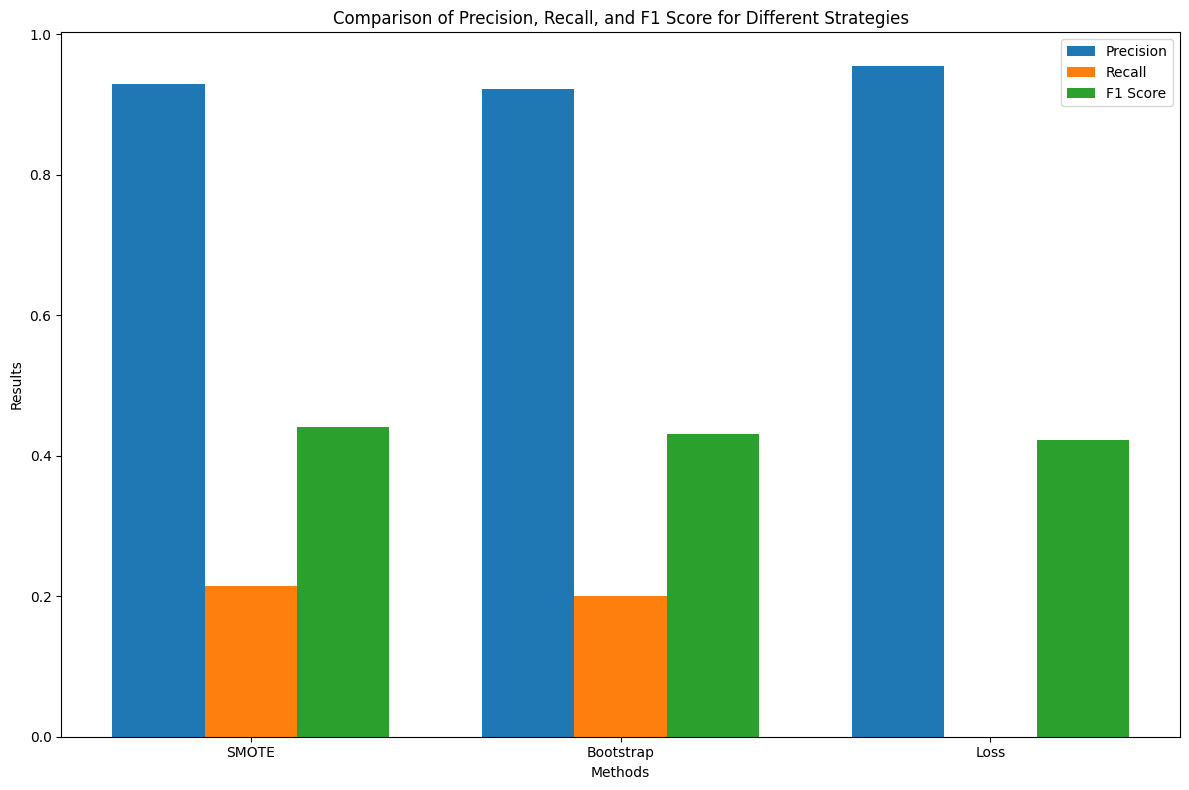

In [16]:

# Data for the graph
categories = ['SMOTE', 'Bootstrap', 'Loss']
labels = ['Precision', 'Recall', 'F1 Score']


# Values for each trial(Precision, Recall, F1 in order, with no diabetes being [0], pre-diabetes being [1], and diabetes being [2])

smote_results = [
    [0.9293626914660832, 0.021553124661540128, 0.34769481844145245],  
    [0.6359701457616809, 0.21490280777537796, 0.6027726694016127],
    [0.7551709288919141, 0.03917708435869672, 0.4410060028979507]
]

loss_results = [
    [0.9552157477097026, 0.0, 0.2809151733495532], 
    [0.6562317212980511, 0.0, 0.8493421983307399],
    [0.7779873516032397, 0.0, 0.42219253217073344]
]

bootstrap_results = [
    [0.9221827890469834, 0.021359669269637116, 0.3498011489173663],  
    [0.6626658243840808, 0.20086393088552915, 0.5599094638562738],
    [0.7711765186375147, 0.03861324475814822, 0.43059181897302]
]

x = np.arange(len(categories))  # the label locations
width = 0.25  # width of each bar

fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the data
ax.bar(x - width, [val[0] for val in [smote_results[0], bootstrap_results[0], loss_results[0]]], width, label='Precision')
ax.bar(x, [val[1] for val in [smote_results[1], bootstrap_results[1], loss_results[1]]], width, label='Recall')
ax.bar(x + width, [val[2] for val in [smote_results[2], bootstrap_results[2], loss_results[2]]], width, label='F1 Score')

# Add labels, title, and legend
ax.set_xlabel('Methods')
ax.set_ylabel('Results')
ax.set_title('Comparison of Precision, Recall, and F1 Score for Different Strategies')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.show()


We can observe some features that don't really matter (for the logistic model), as well as the features and how they affect the eventual prediction downstream. The higher the coefficient's magnitude, the more important it is. The sign represents the increase (negative) in risk versus decrease (positive) in risk.